In [421]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as s

In [422]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')

In [423]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [425]:
df = df.dropna()

In [426]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/177162232.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [427]:
print("Первый клиент совершил первую покупку: ",df.Dt_Customer.min())
print("Последний клиент совершил первую покупку: ",df.Dt_Customer.max())

Первый клиент совершил первую покупку:  2012-01-08 00:00:00
Последний клиент совершил первую покупку:  2014-12-06 00:00:00


In [428]:
df['Lifetime']=[(df.Dt_Customer.max()-i).days for i in df.Dt_Customer]

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/3879476118.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [429]:
df['Age'] = 2015 - df.Year_Birth

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/2968139724.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [430]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/3397200485.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [431]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/640201636.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
df["Children"]=df["Kidhome"]+df["Teenhome"]
df_reg = df.copy()
df = df.drop(['Teenhome','Kidhome'],axis=1)

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/3819356085.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [433]:
df_reg

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-04-09       58       635  ...             0   
1            1  2014-08-03       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-10-02       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-10-06       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Lifetime  \
0                0         0              3         11         1       971   
1                0         0              3         11         0       125   
2                0         0              3         11         0       472   
3                0         0              3         11         0        65   
4                0         0              3         11         0       321   
...            ...       ...            ...        ...       ...       ...   
2235             0         0              3         11         0       541   
2236             0         0              3         11         0        61   
2237             0         0              3         11         0       315   
2238             0         0              3         11         0       316   
2239             0         0              3         11         1       782   

      Age  Spent  Children  
0      58   1617         0  
1      61     27         2  
2      50    776         0  
3      31     53         1  
4      34    422         1  
...   ...    ...       ...  
2235   48   1341         1  
2236   69    444         3  
2237   34   1241         0  
2238   59    843         1  
2239   61    172         2  

[2216 rows x 33 columns]

In [434]:
df_reg = df_reg[['Income','Education','Teenhome','Kidhome','Marital_Status']]
df_reg["Teen"] = np.where(df_reg.Teenhome> 0, 1, 0)
df_reg["Kid"] = np.where(df_reg.Kidhome> 0, 1, 0)
df_reg = pd.get_dummies(df_reg,columns = ['Education','Marital_Status'],drop_first=True)
X = sm.add_constant(df_reg.drop(['Kidhome','Teenhome'],axis=1))

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/3120626778.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/3120626778.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [435]:
result1 = sm.OLS(df.Spent.values, X.drop(['Education_Basic','Education_Master','Education_PhD','Education_Graduation','Marital_Status_Partner'],axis=1)).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     986.6
Date:                Mon, 27 Dec 2021   Prob (F-statistic):               0.00
Time:                        07:27:33   Log-Likelihood:                -16389.
No. Observations:                2216   AIC:                         3.279e+04
Df Residuals:                    2212   BIC:                         3.281e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.1611     26.941      9.360      0.0

In [436]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [437]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [438]:
df.Education = df.Education.replace({'2n Cycle':'Master'})

In [439]:
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [440]:
df.describe()

Income      Recency        Wines       Fruits         Meat  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354    49.012635   305.091606    26.356047   166.995939   
std     25173.076661    28.948352   337.327920    39.793917   224.283273   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000    24.000000    24.000000     2.000000    16.000000   
50%     51381.500000    49.000000   174.500000     8.000000    68.000000   
75%     68522.000000    74.000000   505.000000    33.000000   232.250000   
max    666666.000000    99.000000  1493.000000   199.000000  1725.000000   

              Fish       Sweets         Gold  NumDealsPurchases  \
count  2216.000000  2216.000000  2216.000000        2216.000000   
mean     37.637635    27.028881    43.965253           2.323556   
std      54.752082    41.072046    51.815414           1.923716   
min       0.000000     0.000000     0.000000           0.000000   
25%       3.000000     1.000000     9.000000           1.000000   
50%      12.000000     8.000000    24.500000           2.000000   
75%      50.000000    33.000000    56.000000           3.000000   
max     259.000000   262.000000   321.000000          15.000000   

       NumWebPurchases  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count      2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean          4.085289  ...      0.073105      0.064079      0.013538   
std           2.740951  ...      0.260367      0.244950      0.115588   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           2.000000  ...      0.000000      0.000000      0.000000   
50%           4.000000  ...      0.000000      0.000000      0.000000   
75%           6.000000  ...      0.000000      0.000000      0.000000   
max          27.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response     Lifetime          Age        Spent  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.009477     0.150271   512.006318    46.179603   607.075361   
std       0.096907     0.357417   232.469034    11.985554   602.900476   
min       0.000000     0.000000     0.000000    19.000000     5.000000   
25%       0.000000     0.000000   340.000000    38.000000    69.000000   
50%       0.000000     0.000000   513.000000    45.000000   396.500000   
75%       0.000000     0.000000   686.000000    56.000000  1048.000000   
max       1.000000     1.000000  1063.000000   122.000000  2525.000000   

          Children    Is_Parent  
count  2216.000000  2216.000000  
mean      0.947202     0.714350  
std       0.749062     0.451825  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     1.000000  
max       3.000000     1.000000  

[8 rows x 25 columns]

<Figure size 576x396 with 0 Axes>

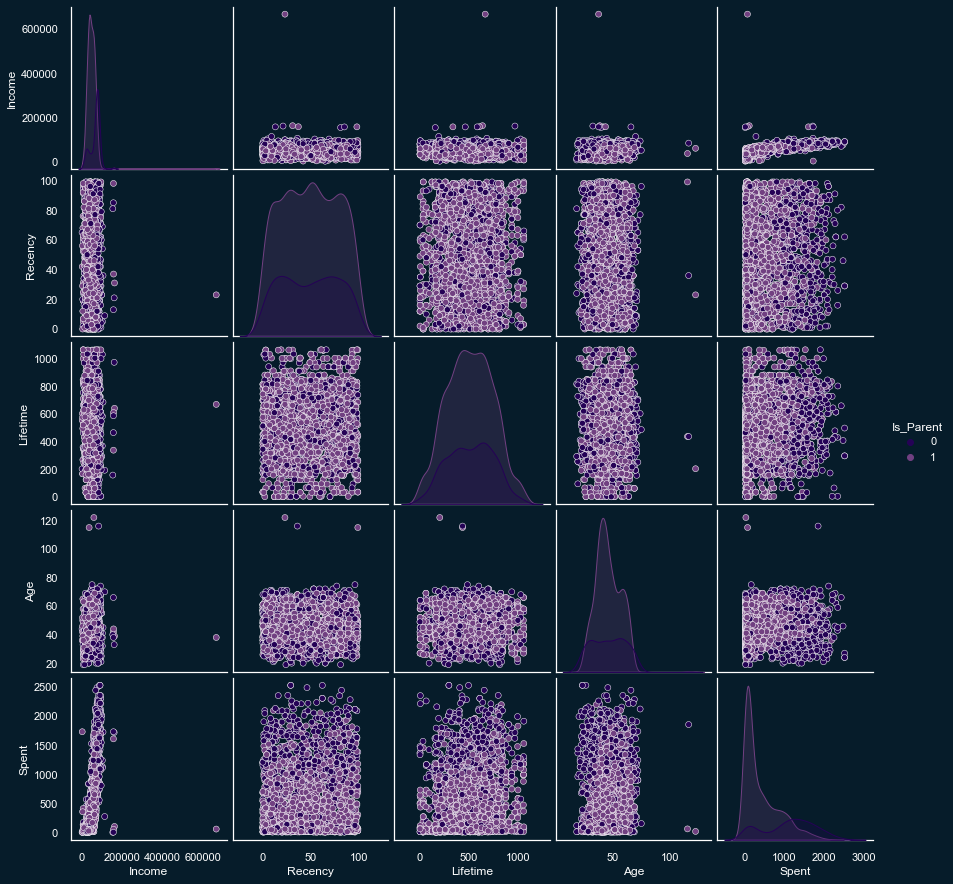

In [441]:
#pal = ['#aec086','#b9c5c7','#d7d2cc','#a08c7d','#b3504b','#513e5c']
pal = ['#61008D','#250256','#523AD6','#020028','#03AEF3']
pal1 = ['#19f5b8','#6ff3ce','#c6f2e5','#000000','#1c0026','#3d0f4d','#714081','#b38fbf','#ffffff']

To_Plot = [ "Income", "Recency", "Lifetime", "Age", "Spent", "Is_Parent"]
sns.set(rc={'axes.facecolor':'#061C2A', 'figure.facecolor':'#061C2A','text.color':'#ffffff',
            'axes.labelcolor':'#ffffff','ytick.color':'#ffffff','xtick.color':'#ffffff',
            'axes.grid' : False,'font.family':'Arial'})
plt.figure()
sns.pairplot(df[To_Plot],hue='Is_Parent',palette=[pal[1],pal1[6]])
plt.show()

In [442]:
matplotlib.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#061C2A',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [443]:
df = df[df.Income<600000]
df = df[df.Age<90]
df["Spent"] = df[['Wines','Meat','Fish','Sweets','Gold']].sum(axis=1)

<Figure size 576x396 with 0 Axes>

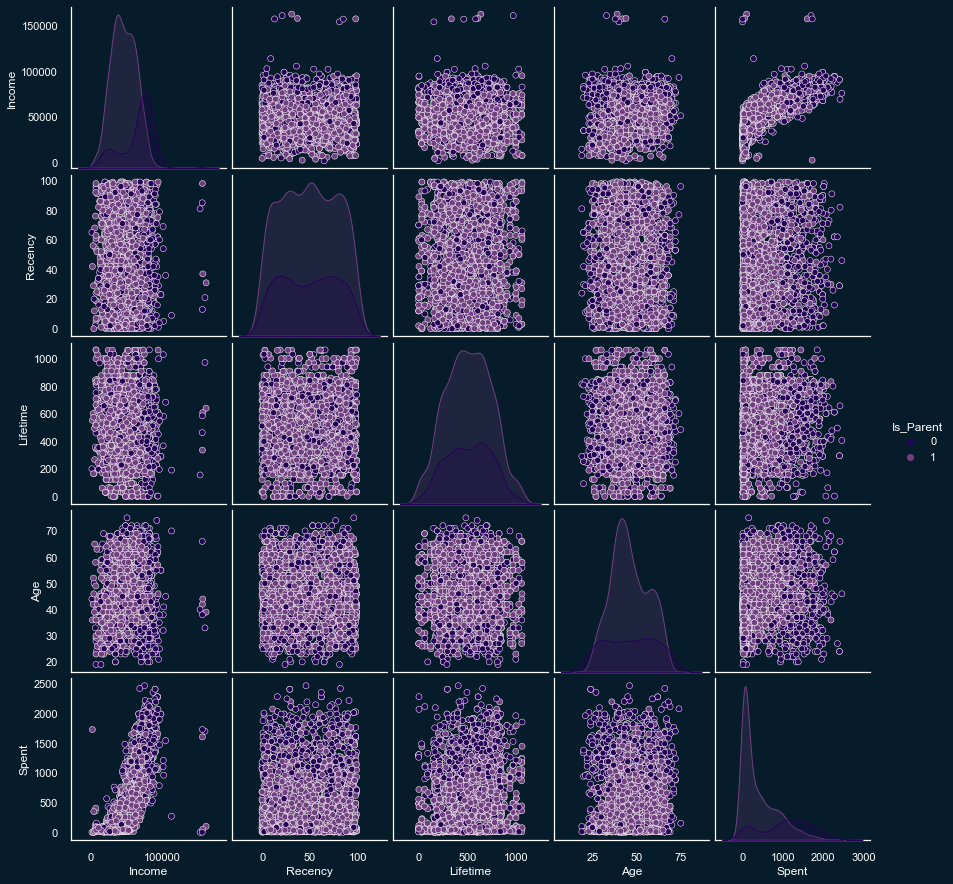

In [444]:
To_Plot = [ "Income", "Recency", "Lifetime", "Age", "Spent", "Is_Parent"]
sns.set(rc={'axes.facecolor':'#061C2A', 'figure.facecolor':'#061C2A','text.color':'#ffffff',
            'axes.labelcolor':'#ffffff','ytick.color':'#ffffff','xtick.color':'#ffffff',
            'axes.grid' : False,'font.family':'Arial'})
plt.figure()
sns.pairplot(df[To_Plot],hue='Is_Parent',palette=[pal[1],pal1[6]])
plt.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/3923924298.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



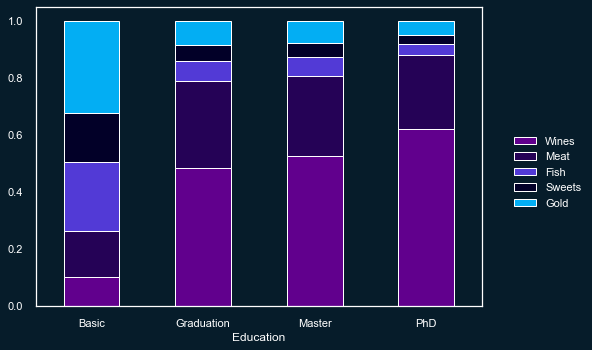

In [445]:
factor = 'Education'
wide_df = df.groupby(factor)['Spent','Wines','Meat','Fish','Sweets','Gold'].sum()
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df.drop('Spent',axis=1).plot(kind='bar', stacked=True,
                                                         color=pal[:5],edgecolor='#ffffff')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor = (1.05, 0.6))

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/4045339970.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



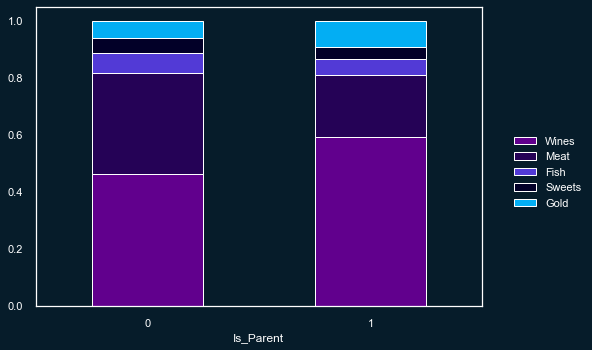

In [446]:
factor = 'Is_Parent'
wide_df = df.groupby(factor)['Spent','Wines','Meat','Fish','Sweets','Gold'].sum()
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df.drop('Spent',axis=1).plot(kind='bar', stacked=True,
                                                         color=pal[:5],edgecolor='#ffffff')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor = (1.05, 0.6))

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/2468838024.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



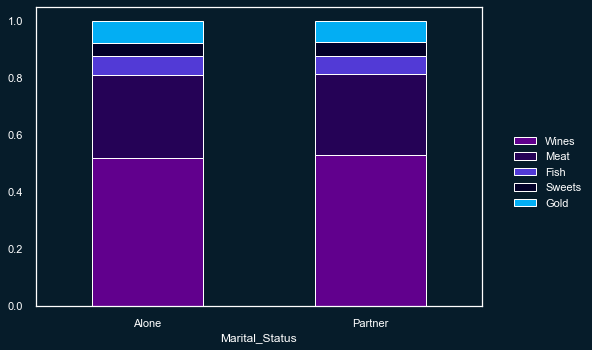

In [447]:
factor = 'Marital_Status'
wide_df = df.groupby(factor)['Spent','Wines','Meat','Fish','Sweets','Gold'].sum()
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/wide_df.loc[i].Spent
wide_df.drop('Spent',axis=1).plot(kind='bar', stacked=True,
                                                         color=pal[:5],edgecolor='#ffffff')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor = (1.05, 0.6))

In [448]:
sns.set(rc={'axes.facecolor':'#061C2A', 'figure.facecolor':'#061C2A','text.color':'#ffffff',
            'axes.labelcolor':'#ffffff','ytick.color':'#ffffff','xtick.color':'#ffffff',
            'axes.grid' : False,'font.family':'Arial'})

In [449]:
import plotly.graph_objects as go
y = 'Spent'
factor = 'Education'
layout = go.Layout(
    font_family = "Roboto",
    font_color = '#ffffff',
    paper_bgcolor='#061C2A',
    plot_bgcolor ='#061C2A',
    yaxis_zeroline = False,
    yaxis_zerolinewidth = 2,
    yaxis_showgrid = True,
    yaxis_showline = True,
    yaxis_linewidth = 1,
    yaxis_linecolor = '#ffffff',
    yaxis_gridcolor = '#a9aeaf',
    yaxis_mirror = True,
    xaxis_showline = True,
    xaxis_linewidth = 1,
    xaxis_mirror = True
)
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [450]:
y = 'Spent'
factor = 'Marital_Status'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [451]:
y = 'Spent'
factor = 'Is_Parent'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [452]:
y = 'Income'
factor = 'Education'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [453]:
y = 'Income'
factor = 'Marital_Status'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [454]:
y = 'Income'
factor = 'Is_Parent'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [455]:
qunt_features = ['Income','Recency','Wines','Fruits','Sweets','Gold','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Lifetime','Age','Spent','Children']

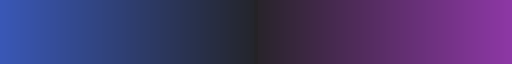

In [456]:
cmap = sns.diverging_palette(260,295, l=40, center="dark", as_cmap=True)
cmap

Text(0.5, 1.0, 'Correlation Heatmap')

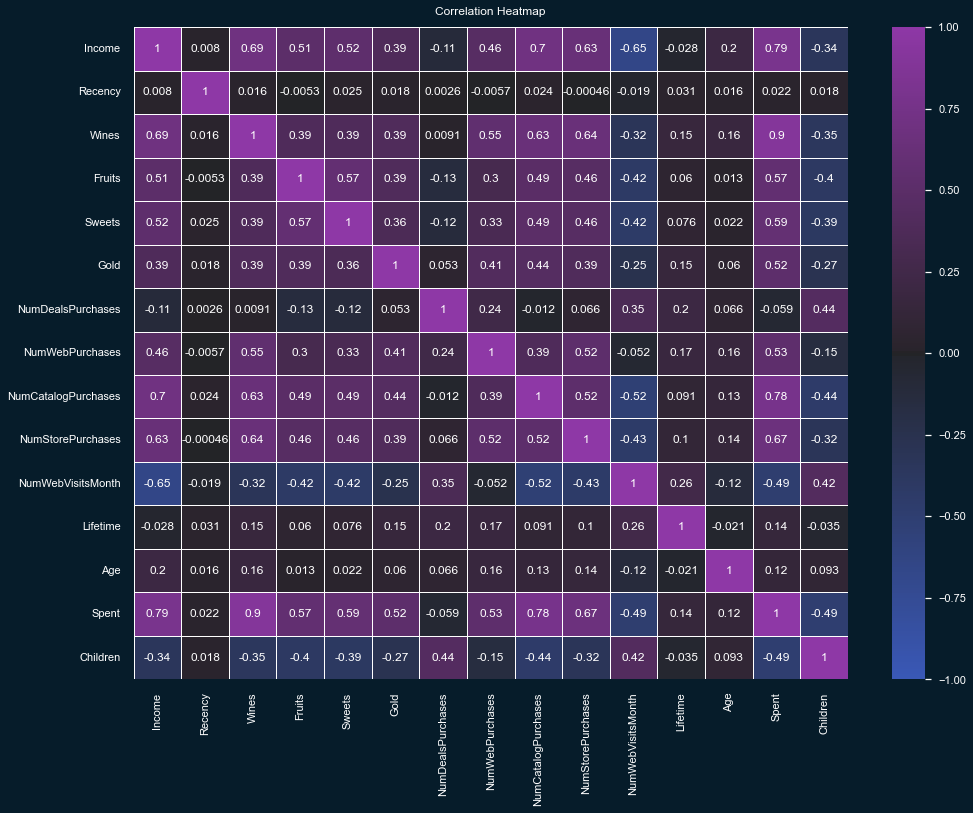

In [457]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df[qunt_features].corr(), vmin=-1, vmax=1, annot=True,
                      cmap=cmap,
                      center= 0, linewidths=1, linecolor='white')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [458]:
df_old = df.copy()
object_cols = df.dtypes.index[df.dtypes == 'object']
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [459]:
df0 = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],axis=1)
#Scaling
scaled = StandardScaler()
scaled_df = pd.DataFrame(scaled.fit_transform(df0))

In [460]:
scaled_df.columns = df0.columns

In [632]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  0.000000e+00  2.720446 -5.441248 -2.451167 -0.823571  2.320532   
col2  2212.0 -3.212219e-17  1.457367 -3.770907 -1.021962 -0.238616  0.939431   
col3  2212.0  4.336495e-17  1.192585 -3.616276 -0.788775  0.025373  0.796663   

           max  
col1  7.509833  
col2  5.750011  
col3  4.666160

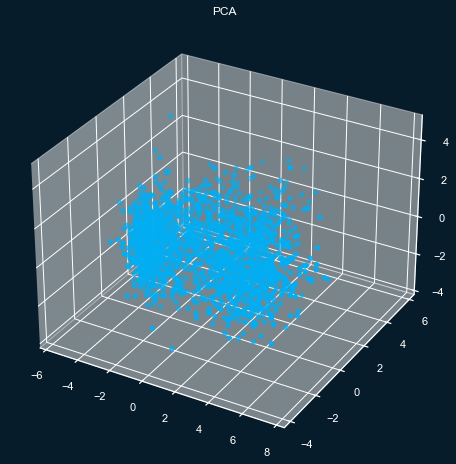

In [633]:
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#03AEF3", marker="o" )
ax.set_title("PCA")
plt.show()

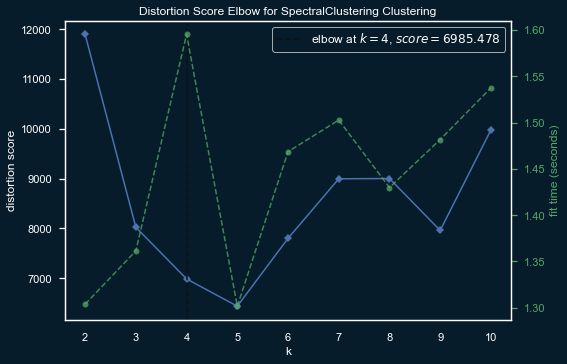

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [634]:
Elbow_M = KElbowVisualizer(SpectralClustering(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [617]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

In [618]:
KM = KMeans(n_clusters=4,random_state=8)
yhat_KM = KM.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_KM
df["Clusters"]= yhat_KM

In [635]:
SC = SpectralClustering(n_clusters=4)
yhat_SC = SC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_SC
df["Clusters"]= yhat_SC

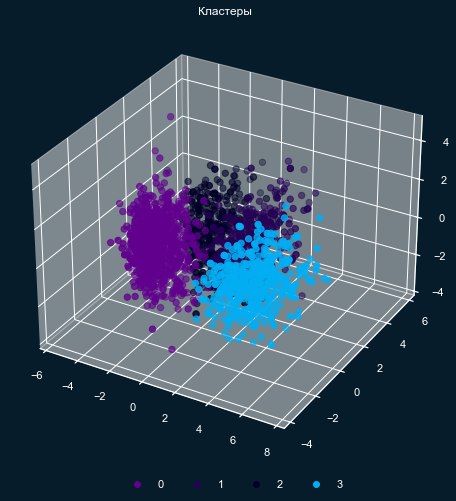

In [636]:

from matplotlib import colors
cmap = colors.ListedColormap(pal)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="",)
sc = ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o',cmap = cmap)
ax.set_title("Кластеры")

plt.legend(*sc.legend_elements(), bbox_to_anchor=(0.25, -0.1), loc='lower left', ncol=4)
plt.show()

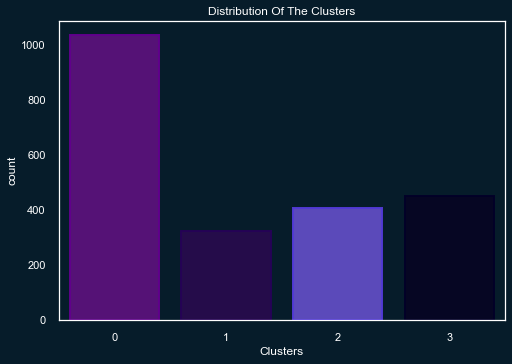

In [637]:
pl = sns.countplot(x=df["Clusters"], palette= pal,alpha=0.95,edgecolor=pal,linewidth=2)
pl.set_title("Distribution Of The Clusters")
plt.show()

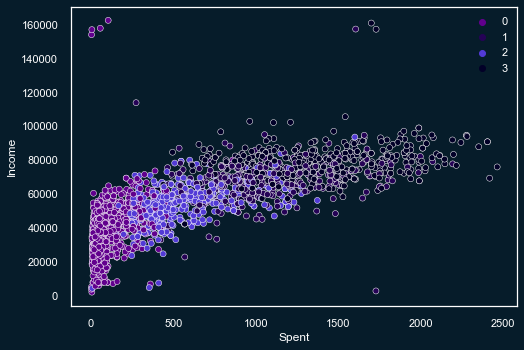

In [638]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal[:4])
pl.set_title("")
plt.legend()
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.4163132851255277
For n_clusters = 4 The average silhouette_score is : 0.3431366881164138


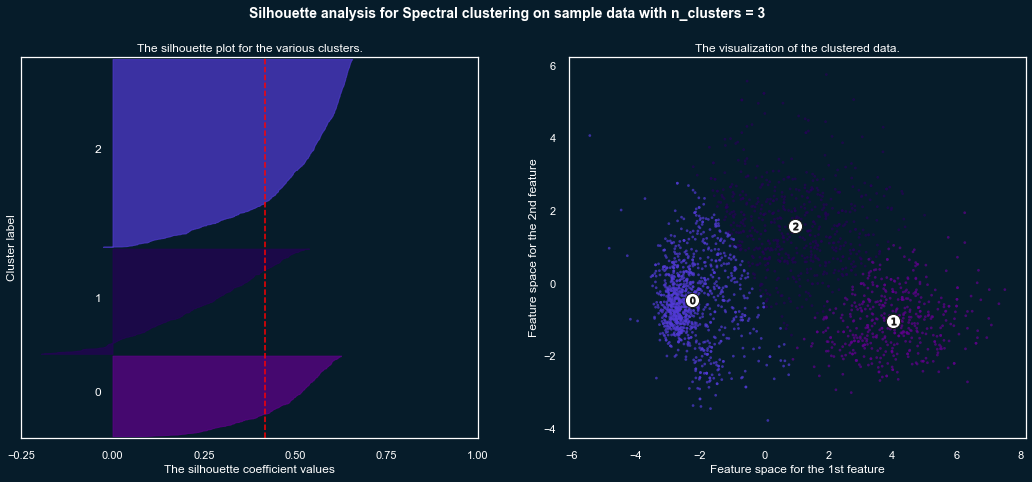

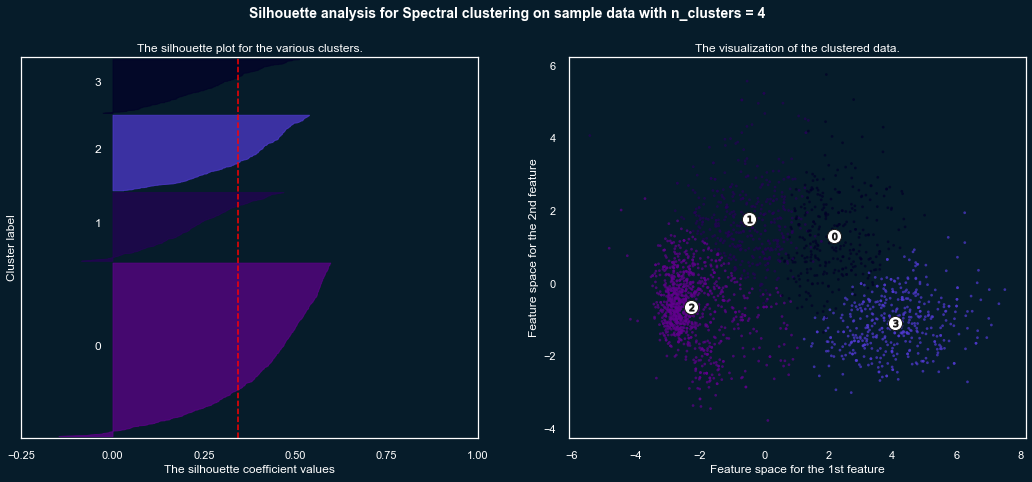

In [651]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [3, 4]
X = PCA_df[['col1','col2','col3']].values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = SpectralClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = pal[i]
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.25, 0, 0.25, 0.5, 0.75, 1])

    # 2nd Plot showing the actual clusters formed
    colors = [pal[c] for c in cluster_labels]
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    
    y_predic = clusterer.fit_predict(X)
    clf = NearestCentroid()
    clf.fit(X, y_predic)
    centers =clf.centroids_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for Spectral clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.34487557965922166
For n_clusters = 4 The average silhouette_score is : 0.31687418252806593


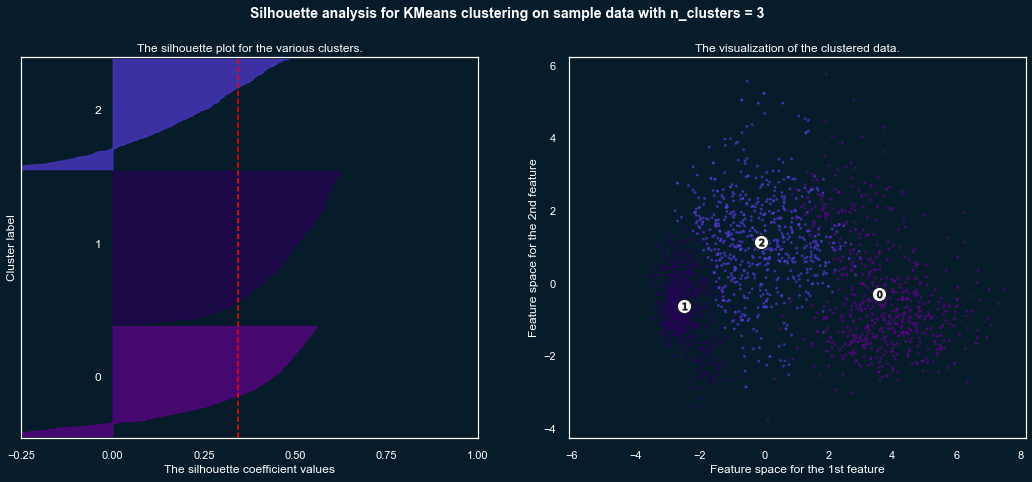

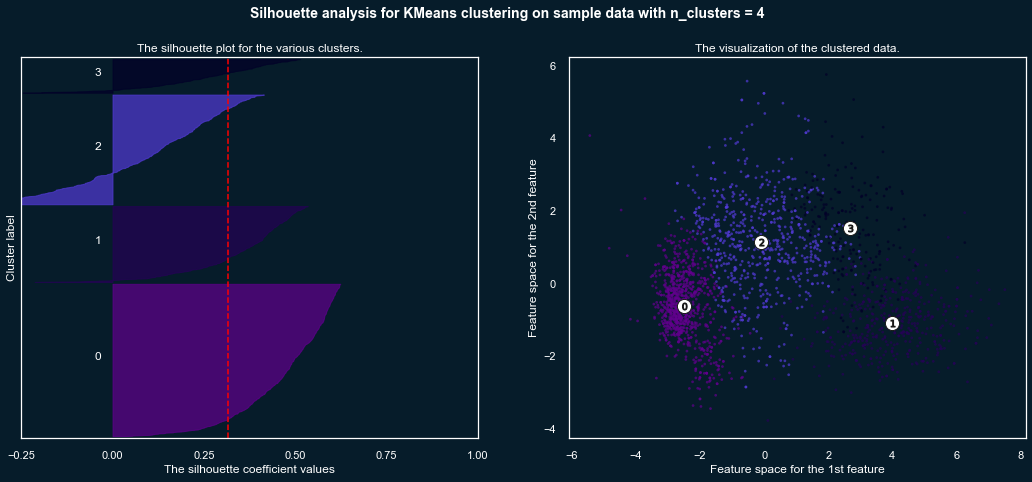

In [640]:

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [3, 4]
X = PCA_df[['col1','col2','col3']].values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = pal[i]
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.25, 0, 0.25, 0.5, 0.75, 1])

    # 2nd Plot showing the actual clusters formed
    colors = [pal[c] for c in cluster_labels]
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    
    y_predic = clusterer.fit_predict(X)
    clf = NearestCentroid()
    clf.fit(X, y_predic)
    centers =clf.centroids_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.41174910747527277
For n_clusters = 4 The average silhouette_score is : 0.31064254530299623


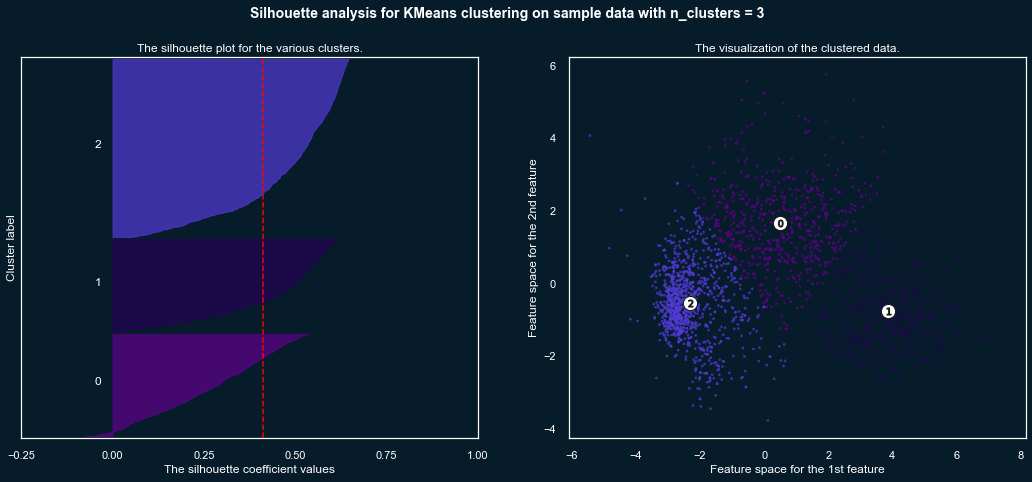

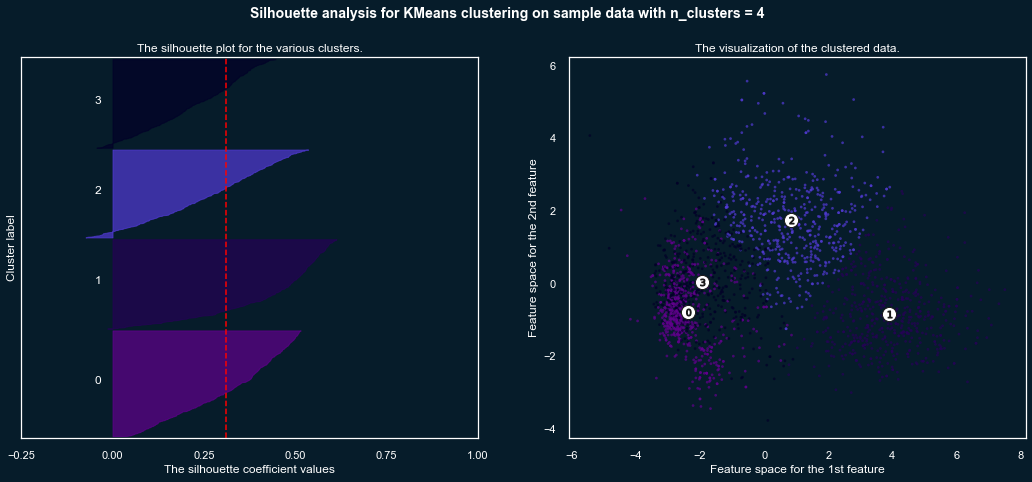

In [641]:

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [3, 4]
X = PCA_df[['col1','col2','col3']].values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,random_state = 8)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = pal[i]
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.25, 0, 0.25, 0.5, 0.75, 1])

    # 2nd Plot showing the actual clusters formed
    colors = [pal[c] for c in cluster_labels]
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/4240945932.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



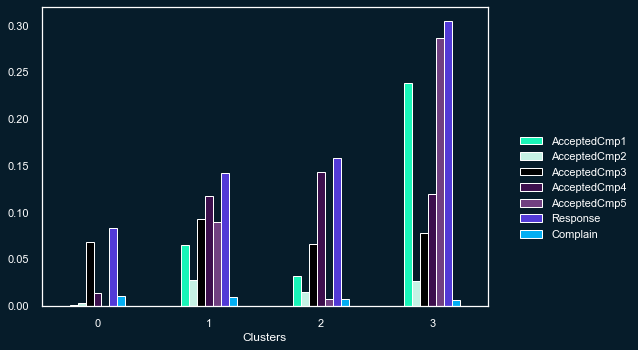

In [642]:
pal2 = ['#19f5b8','#c6f2e5','#000000','#3d0f4d','#714081','#523AD6','#03AEF3']
factor = 'Clusters'
wide_df = df.groupby(factor)['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response','Complain'].sum()
for i in wide_df.index:
    wide_df.loc[i]=wide_df.loc[i]/sum(df.Clusters==i)
wide_df.plot(kind='bar',color=pal2,edgecolor='#ffffff')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor = (1.05, 0.6))

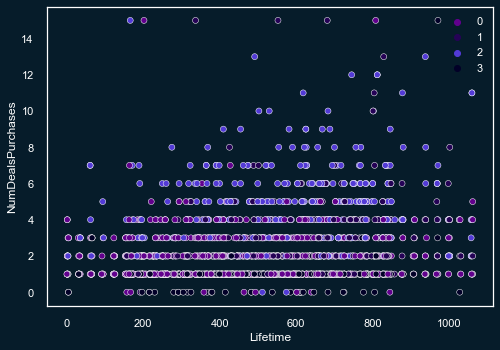

In [643]:
pl = sns.scatterplot(data = df,x=df["Lifetime"], y=df["NumDealsPurchases"],hue=df["Clusters"], palette= pal[:4])
pl.set_title("")
plt.legend()
plt.show()

In [644]:
df.groupby('Clusters').NumDealsPurchases.mean()

Clusters
0    1.905131
1    2.888545
2    4.389163
3    1.020000
Name: NumDealsPurchases, dtype: float64

In [647]:
y = 'P_all'
df['P_all'] = (df.NumWebPurchases+df.NumStorePurchases)
factor = 'Clusters'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [648]:
df['Spent_PP'] = df.Spent/(df.NumWebPurchases+df.NumStorePurchases)
df.Spent_PP[df.Spent_PP>1600] = df.Spent_PP.mean()
y = 'Spent_PP'
factor = 'Clusters'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/2021007398.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [649]:
df['Web_P'] = df.NumWebPurchases/(df.NumWebPurchases+df.NumStorePurchases)
y = 'Web_P'
factor = 'Clusters'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

In [650]:
df['disc']=df.NumDealsPurchases/(df.NumWebPurchases+df.NumStorePurchases)
df.disc[df.disc>2] = df.disc.mean()
y = 'disc'
factor = 'Clusters'
layout.xaxis.title = factor
layout.yaxis.title = y
fig = go.Figure(layout=layout)
for e in enumerate(df[factor].unique()):
    fig.add_trace(go.Box(y=df[y][df[factor]==e[1]], name=str(e[1]),
                marker_color = pal[e[0]]))
fig.show()

C:\Users\19517476\AppData\Local\Temp/ipykernel_14304/918976522.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

